In [1]:
import numpy as np
import matplotlib.pyplot as plt
from DecisionTree import *

In [2]:
csv = np.genfromtxt("e8.csv", delimiter=',', skip_header=1, dtype=float)
np.random.shuffle(csv)
train_len = int(csv.shape[0]*0.9)
train_csv = csv[:train_len]
val_csv = csv[train_len:]

t_data = train_csv[:,:-1]
t_label = np.array(train_csv[:,-1]).reshape(len(t_data),1)
v_data = val_csv[:,:-1]
v_label = np.array(val_csv[:,-1]).reshape(len(v_data),1)

In [3]:
dt = DecisionTree(t_data,t_label,task='regression')
dt.train()
print(f"score : {dt.score(v_data,v_label)}")# 

score : 0.9486981254049107


In [4]:
dt.show()

Decision Tree Structure:
Feature: 0
  └─ Value: <=290.661
    Feature: 4
      └─ Value: <=22552155.485
        Feature: 3
          └─ Value: <=76673.330
            Feature: 1
              └─ Value: <=11.839
                Feature: 2
                  └─ Value: <=2379.344
                      └─ Label: 99.92574493557447
                  └─ Value: >2379.344
                      └─ Label: 99.48005746145076
              └─ Value: >11.839
                Feature: 2
                  └─ Value: <=3172.924
                      └─ Label: 99.9992691935833
                  └─ Value: >3172.924
                      └─ Label: 99.9495159470865
          └─ Value: >76673.330
            Feature: 1
              └─ Value: <=16.776
                Feature: 2
                  └─ Value: <=2095.540
                      └─ Label: 94.53627881058053
                  └─ Value: >2095.540
                      └─ Label: 95.49228628285952
              └─ Value: >16.776
                Feature: 2
 

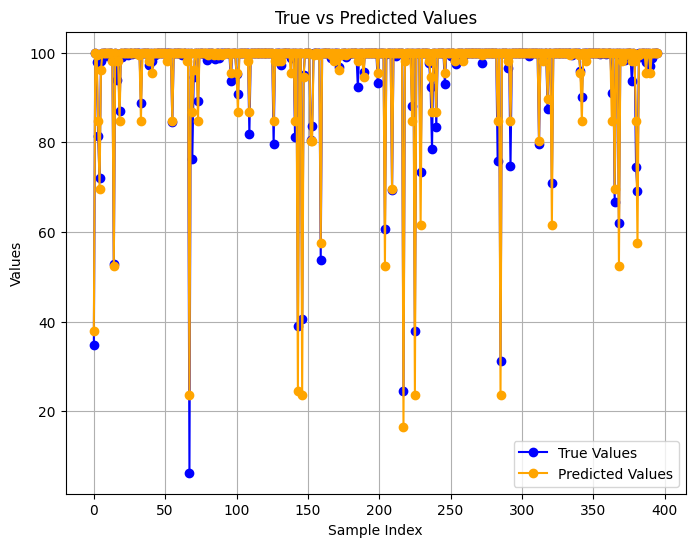

In [5]:
plt.figure(figsize=(8, 6))
y_true = v_label.flatten()
y_pred = dt.predict(v_data)
plt.plot(range(len(y_true)), y_true, 'o-', label='True Values', color='blue') 
plt.plot(range(len(y_pred)), y_pred, 'o-', label='Predicted Values', color='orange')

plt.xlabel("Sample Index")
plt.ylabel("Values")
plt.title("True vs Predicted Values")
plt.legend()
plt.grid(True)
plt.show()

In [6]:
dt.save_model("e8.pkl")

In [2]:
dt = DecisionTree(None,None,None)
dt.load_model("e8.pkl")